### Importing the txt file and converting it into csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv

# Convert text file to CSV
def text_to_csv(text_filename, csv_filename):
    with open(text_filename, 'r') as text_file, open(csv_filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        for line in text_file:
            columns = line.strip().split('\t')
            csv_writer.writerow(columns)

    print("Text file converted to CSV successfully.")

text_filename = 'emails.txt'
csv_filename = 'mycsv.csv'
text_to_csv(text_filename, csv_filename)

Text file converted to CSV successfully.


In [3]:
df = pd.read_csv("mycsv.csv", header=None)

In [4]:
df.shape

(5574, 2)

In [5]:
df.columns = ['class_label', 'message']
# it has no columns till now. so we use this method

In [6]:
df.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,'Free entry in 2 a wkly comp to win FA Cup fin...
3,ham,U dun say so early hor... U c already then say...
4,ham,"'Nah I don''t think he goes to usf, he lives a..."


In [7]:
df['class_label'].value_counts()

class_label
ham     4827
spam     747
Name: count, dtype: int64

<Axes: xlabel='class_label', ylabel='count'>

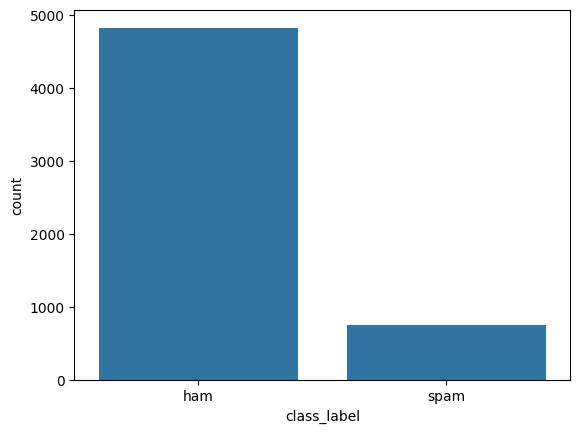

In [8]:
import seaborn as sns
sns.countplot(x='class_label', data = df)

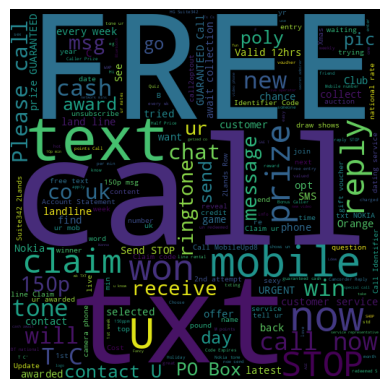

In [9]:
from wordcloud import WordCloud
spam_words = ''.join(list(df[df['class_label'] == 'spam']['message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

### Removing StopWords

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
stop_words = stopwords.words('english')
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [13]:
df

,class_label,message
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,'Free entry 2 wkly comp win FA Cup final tkts ...
3,ham,U dun say early hor... U c already say...
4,ham,"'Nah I don''t think goes usf, lives around tho..."
...,...,...
5569,spam,This 2nd time tried 2 contact u. U £750 Pound ...
5570,ham,Will ü b going esplanade fr home?
5571,ham,"Pity, * mood that. So...any suggestions?"
5572,ham,'The guy bitching I acted like i''d interested...


In [14]:
import string
def remove_punctuation(message):
    # Replace all punctuation characters with empty string
    translator = str.maketrans('', '', string.punctuation)
    message_without_punctuation = message.translate(translator)
    return message_without_punctuation

In [15]:
df['cleaned_message'] = df['message'].apply(remove_punctuation)

In [16]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
def lemmatize_message(message):

    message = message.lower()
    # Tokenize the message into words
    words = word_tokenize(message)

    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word and store the results in a new list
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a single string
    lemmatized_message = ' '.join(lemmatized_words)

    return lemmatized_message


In [18]:
df['cleaned_message'] = df['cleaned_message'].apply(lemmatize_message)

In [19]:
df

,class_label,message,cleaned_message
0,ham,"Go jurong point, crazy.. Available bugis n gre...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,'Free entry 2 wkly comp win FA Cup final tkts ...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say early hor... U c already say...,u dun say early hor u c already say
4,ham,"'Nah I don''t think goes usf, lives around tho...",nah i dont think go usf life around though
...,...,...,...
5569,spam,This 2nd time tried 2 contact u. U £750 Pound ...,this 2nd time tried 2 contact u u £750 pound p...
5570,ham,Will ü b going esplanade fr home?,will ü b going esplanade fr home
5571,ham,"Pity, * mood that. So...any suggestions?",pity mood that soany suggestion
5572,ham,'The guy bitching I acted like i''d interested...,the guy bitching i acted like id interested bu...


In [20]:
def tokenize_message(preprocessed_message):
    return word_tokenize(preprocessed_message)

In [21]:
df['tokenized_message'] = df['cleaned_message'].apply(tokenize_message)

In [22]:
df.head()

,class_label,message,cleaned_message,tokenized_message
0,ham,"Go jurong point, crazy.. Available bugis n gre...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,'Free entry 2 wkly comp win FA Cup final tkts ...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say early hor... U c already say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"'Nah I don''t think goes usf, lives around tho...",nah i dont think go usf life around though,"[nah, i, dont, think, go, usf, life, around, t..."


In [23]:
df['num_tokens'] = df['tokenized_message'].apply(lambda x: len(x))

In [24]:
df.head()

,class_label,message,cleaned_message,tokenized_message,num_tokens
0,ham,"Go jurong point, crazy.. Available bugis n gre...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...",16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",6
2,spam,'Free entry 2 wkly comp win FA Cup final tkts ...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",23
3,ham,U dun say early hor... U c already say...,u dun say early hor u c already say,"[u, dun, say, early, hor, u, c, already, say]",9
4,ham,"'Nah I don''t think goes usf, lives around tho...",nah i dont think go usf life around though,"[nah, i, dont, think, go, usf, life, around, t...",9


In [25]:
corpus = df['cleaned_message'].tolist()

In [26]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s',
 'u dun say early hor u c already say',
 'nah i dont think go usf life around though',
 'freemsg hey darling it 3 week word back id like fun still tb ok xxx std chgs send £150 rcv',
 'even brother like speak me they treat like aid patent',
 'a per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner a valued network customer selected receivea £900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour only',
 'had mobile 11 month more u r entitled update latest colour mobile camera free call the mobile update co free 08002986030',
 'im gon na home soon dont want talk stuff anymore tonight k ive cried enough today',
 'six chance win cash from 100 20000 poun

In [27]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [28]:
y=pd.get_dummies(df['class_label'])
y=y.iloc[:,1].values

In [29]:
y[:10]

array([False, False,  True, False, False,  True, False, False,  True,
        True])

In [30]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# KNN classifier with cosine similarity
knn_classifier = KNeighborsClassifier(metric='cosine', n_neighbors=10)

# Train the classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [33]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.95695067264574


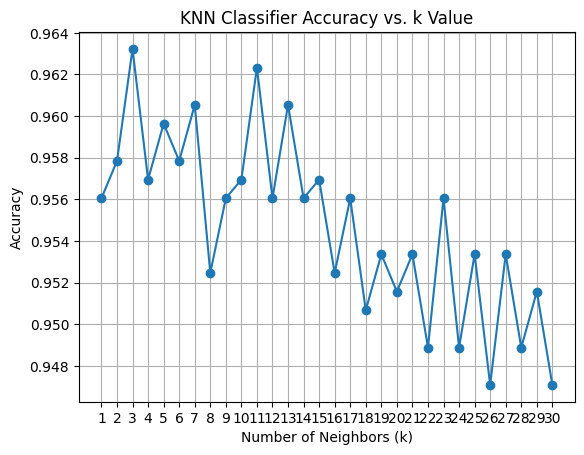

In [34]:
# Define a range of k values to try
k_values = list(range(1, 31))

# Initialize lists to store accuracy values for each k
accuracy_values = []

# Sweep through different k values
for k in k_values:
    # Create the KNN classifier with k neighbors and cosine similarity
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='cosine')

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = np.mean(y_pred == y_test)

    # Append the accuracy to the list
    accuracy_values.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. k Value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [35]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [36]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [38]:
# KNN classifier with cosine similarity
knn_classifier = KNeighborsClassifier(metric='cosine', n_neighbors=10)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9623318385650225


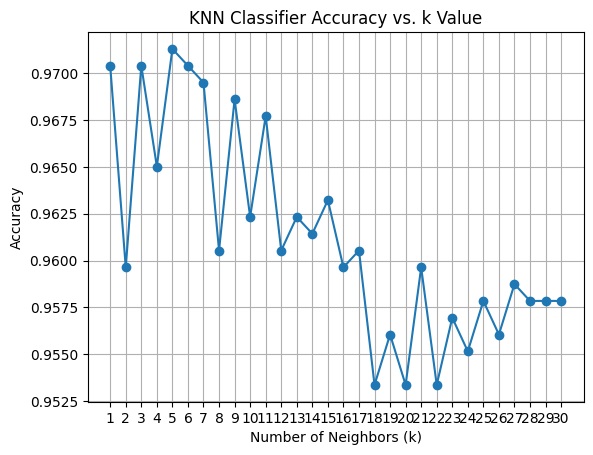

In [39]:
# Define a range of k values to try
k_values = list(range(1, 31))

# Initialize lists to store accuracy values for each k
accuracy_values = []

# Sweep through different k values
for k in k_values:
    # Create the KNN classifier with k neighbors and cosine similarity
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='cosine')

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = np.mean(y_pred == y_test)

    # Append the accuracy to the list
    accuracy_values.append(accuracy)

# Plot the graph
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs. k Value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [40]:
!pip install gensim

In [41]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [42]:
vec_king = wv['king']

In [43]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [45]:
import re
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['cleaned_message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [46]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [47]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply',
 'u dun say early hor u c already say',
 'nah dont think go usf life around though']

In [48]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [49]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'dont', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  

In [50]:
import gensim

In [51]:
### Lets train Word2vec from scratch
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [52]:
model.wv.index_to_key

['call',
 'im',
 'get',
 'ur',
 'go',
 'dont',
 'free',
 'ok',
 'ltgt',
 'know',
 'day',
 'got',
 'come',
 'like',
 'ill',
 'good',
 'time',
 'text',
 'want',
 'love',
 'send',
 'need',
 'one',
 'going',
 'today',
 'txt',
 'home',
 'stop',
 'lor',
 'see',
 'sorry',
 'still',
 'back',
 'mobile',
 'think',
 'reply',
 'tell',
 'take',
 'phone',
 'week',
 'new',
 'well',
 'hi',
 'later',
 'da',
 'please',
 'make',
 'cant',
 'night',
 'say',
 'claim',
 'thing',
 'much',
 'oh',
 'dear',
 'great',
 'hey',
 'pls',
 'give',
 'number',
 'happy',
 'na',
 'work',
 'hope',
 'friend',
 'message',
 'way',
 'msg',
 'min',
 'wat',
 'thats',
 'prize',
 'wan',
 'right',
 'let',
 'yes',
 'already',
 'tomorrow',
 'ask',
 'said',
 'really',
 'yeah',
 'win',
 'amp',
 'babe',
 'life',
 'co',
 'miss',
 'meet',
 'didnt',
 'last',
 'morning',
 'year',
 'service',
 'tone',
 'would',
 'thanks',
 'find',
 'anything',
 'cash',
 'ive',
 'feel',
 'nokia',
 'lol',
 'every',
 'sure',
 'also',
 'pick',
 'care',
 'contact

In [53]:
model.corpus_count

5568

In [54]:
model.wv.similar_by_word('kid')

[('people', 0.9966407418251038),
 ('amp', 0.9965543746948242),
 ('wish', 0.9964863061904907),
 ('sleep', 0.9964660406112671),
 ('would', 0.9964249730110168),
 ('min', 0.9964234232902527),
 ('always', 0.9964168071746826),
 ('make', 0.9964014887809753),
 ('could', 0.9963949918746948),
 ('year', 0.9963930249214172)]

In [55]:
model.wv['kid'].shape

(100,)

In [56]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)

    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
                #or [np.zeros(len(model.wv.index_to_key))], axis=0)

In [57]:
!pip install tqdm

In [58]:
from tqdm import tqdm

In [59]:
words[99]

['see', 'cup', 'coffee', 'animation']

In [60]:
type(model.wv.index_to_key)

list

In [61]:
#apply for the entire sentences
X=[]
for i in tqdm(range(len(words))):
    print("Hello",i)
    X.append(avg_word2vec(words[i]))

  2%|▏         | 88/5568 [00:00<00:06, 784.70it/s]

Hello 0
Hello 1
Hello 2
Hello 3
Hello 4
Hello 5
Hello 6
Hello 7
Hello 8
Hello 9
Hello 10
Hello 11
Hello 12
Hello 13
Hello 14
Hello 15
Hello 16
Hello 17
Hello 18
Hello 19
Hello 20
Hello 21
Hello 22
Hello 23
Hello 24
Hello 25
Hello 26
Hello 27
Hello 28
Hello 29
Hello 30
Hello 31
Hello 32
Hello 33
Hello 34
Hello 35
Hello 36
Hello 37
Hello 38
Hello 39
Hello 40
Hello 41
Hello 42
Hello 43
Hello 44
Hello 45
Hello 46
Hello 47
Hello 48
Hello 49
Hello 50
Hello 51
Hello 52
Hello 53
Hello 54
Hello 55
Hello 56
Hello 57
Hello 58
Hello 59
Hello 60
Hello 61
Hello 62
Hello 63
Hello 64
Hello 65
Hello 66
Hello 67
Hello 68
Hello 69
Hello 70
Hello 71
Hello 72
Hello 73
Hello 74
Hello 75
Hello 76
Hello 77
Hello 78
Hello 79
Hello 80
Hello 81
Hello 82
Hello 83
Hello 84
Hello 85
Hello 86
Hello 87
Hello 88
Hello 89
Hello 90
Hello 91
Hello 92
Hello 93
Hello 94
Hello 95
Hello 96
Hello 97
Hello 98
Hello 99
Hello 100
Hello 101
Hello 102
Hello 103
Hello 104
Hello 105
Hello 106
Hello 107
Hello 108
Hello 109
Hello 110


  4%|▍         | 241/5568 [00:00<00:09, 586.43it/s]

Hello 147
Hello 148
Hello 149
Hello 150
Hello 151
Hello 152
Hello 153
Hello 154
Hello 155
Hello 156
Hello 157
Hello 158
Hello 159
Hello 160
Hello 161
Hello 162
Hello 163
Hello 164
Hello 165
Hello 166
Hello 167
Hello 168
Hello 169
Hello 170
Hello 171
Hello 172
Hello 173
Hello 174
Hello 175
Hello 176
Hello 177
Hello 178
Hello 179
Hello 180
Hello 181
Hello 182
Hello 183
Hello 184
Hello 185
Hello 186
Hello 187
Hello 188
Hello 189
Hello 190
Hello 191
Hello 192
Hello 193
Hello 194
Hello 195
Hello 196
Hello 197
Hello 198
Hello 199
Hello 200
Hello 201
Hello 202
Hello 203
Hello 204
Hello 205
Hello 206
Hello 207
Hello 208
Hello 209
Hello 210
Hello 211
Hello 212
Hello 213
Hello 214
Hello 215
Hello 216
Hello 217
Hello 218
Hello 219
Hello 220
Hello 221
Hello 222
Hello 223
Hello 224
Hello 225
Hello 226
Hello 227
Hello 228
Hello 229
Hello 230
Hello 231
Hello 232
Hello 233
Hello 234
Hello 235
Hello 236
Hello 237
Hello 238
Hello 239
Hello 240
Hello 241
Hello 242
Hello 243
Hello 244
Hello 245
Hello 246


  6%|▌         | 342/5568 [00:00<00:07, 717.76it/s]

 269
Hello 270
Hello 271
Hello 272
Hello 273
Hello 274
Hello 275
Hello 276
Hello 277
Hello 278
Hello 279
Hello 280
Hello 281
Hello 282
Hello 283
Hello 284
Hello 285
Hello 286
Hello 287
Hello 288
Hello 289
Hello 290
Hello 291
Hello 292
Hello 293
Hello 294
Hello 295
Hello 296
Hello 297
Hello 298
Hello 299
Hello 300
Hello 301
Hello 302
Hello 303
Hello 304
Hello 305
Hello 306
Hello 307
Hello 308
Hello 309
Hello 310
Hello 311
Hello 312
Hello 313
Hello 314
Hello 315
Hello 316
Hello 317
Hello 318
Hello 319
Hello 320
Hello 321
Hello 322
Hello 323
Hello 324
Hello 325
Hello 326
Hello 327
Hello 328
Hello 329
Hello 330
Hello 331
Hello 332
Hello 333
Hello 334
Hello 335
Hello 336
Hello 337
Hello 338
Hello 339
Hello 340
Hello 341
Hello 342
Hello 343
Hello 344
Hello 345
Hello 346
Hello 347
Hello 348
Hello 349
Hello 350
Hello 351
Hello 352
Hello 353
Hello 354
Hello 355
Hello 356
Hello 357
Hello 358
Hello 359
Hello 360
Hello 361
Hello 362
Hello 363
Hello 364
Hello 365
Hello 366
Hello 367
Hello 368
Hello

  8%|▊         | 418/5568 [00:00<00:08, 636.36it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 11%|█         | 596/5568 [00:00<00:06, 755.38it/s]

Hello 418
Hello 419
Hello 420
Hello 421
Hello 422
Hello 423
Hello 424
Hello 425
Hello 426
Hello 427
Hello 428
Hello 429
Hello 430
Hello 431
Hello 432
Hello 433
Hello 434
Hello 435
Hello 436
Hello 437
Hello 438
Hello 439
Hello 440
Hello 441
Hello 442
Hello 443
Hello 444
Hello 445
Hello 446
Hello 447
Hello 448
Hello 449
Hello 450
Hello 451
Hello 452
Hello 453
Hello 454
Hello 455
Hello 456
Hello 457
Hello 458
Hello 459
Hello 460
Hello 461
Hello 462
Hello 463
Hello 464
Hello 465
Hello 466
Hello 467
Hello 468
Hello 469
Hello 470
Hello 471
Hello 472
Hello 473
Hello 474
Hello 475
Hello 476
Hello 477
Hello 478
Hello 479
Hello 480
Hello 481
Hello 482
Hello 483
Hello 484
Hello 485
Hello 486
Hello 487
Hello 488
Hello 489
Hello 490
Hello 491
Hello 492
Hello 493
Hello 494
Hello 495
Hello 496
Hello 497
Hello 498
Hello 499
Hello 500
Hello 501
Hello 502
Hello 503
Hello 504
Hello 505
Hello 506
Hello 507
Hello 508
Hello 509
Hello 510
Hello 511
Hello 512
Hello 513
Hello 514
Hello 515
Hello 516
Hello 517


 14%|█▍        | 803/5568 [00:01<00:05, 887.40it/s]

 615
Hello 616
Hello 617
Hello 618
Hello 619
Hello 620
Hello 621
Hello 622
Hello 623
Hello 624
Hello 625
Hello 626
Hello 627
Hello 628
Hello 629
Hello 630
Hello 631
Hello 632
Hello 633
Hello 634
Hello 635
Hello 636
Hello 637
Hello 638
Hello 639
Hello 640
Hello 641
Hello 642
Hello 643
Hello 644
Hello 645
Hello 646
Hello 647
Hello 648
Hello 649
Hello 650
Hello 651
Hello 652
Hello 653
Hello 654
Hello 655
Hello 656
Hello 657
Hello 658
Hello 659
Hello 660
Hello 661
Hello 662
Hello 663
Hello 664
Hello 665
Hello 666
Hello 667
Hello 668
Hello 669
Hello 670
Hello 671
Hello 672
Hello 673
Hello 674
Hello 675
Hello 676
Hello 677
Hello 678
Hello 679
Hello 680
Hello 681
Hello 682
Hello 683
Hello 684
Hello 685
Hello 686
Hello 687
Hello 688
Hello 689
Hello 690
Hello 691
Hello 692
Hello 693
Hello 694
Hello 695
Hello 696
Hello 697
Hello 698
Hello 699
Hello 700
Hello 701
Hello 702
Hello 703
Hello 704
Hello 705
Hello 706
Hello 707
Hello 708
Hello 709
Hello 710
Hello 711
Hello 712
Hello 713
Hello 714
Hello

 18%|█▊        | 989/5568 [00:01<00:05, 887.27it/s]

Hello 822
Hello 823
Hello 824
Hello 825
Hello 826
Hello 827
Hello 828
Hello 829
Hello 830
Hello 831
Hello 832
Hello 833
Hello 834
Hello 835
Hello 836
Hello 837
Hello 838
Hello 839
Hello 840
Hello 841
Hello 842
Hello 843
Hello 844
Hello 845
Hello 846
Hello 847
Hello 848
Hello 849
Hello 850
Hello 851
Hello 852
Hello 853
Hello 854
Hello 855
Hello 856
Hello 857
Hello 858
Hello 859
Hello 860
Hello 861
Hello 862
Hello 863
Hello 864
Hello 865
Hello 866
Hello 867
Hello 868
Hello 869
Hello 870
Hello 871
Hello 872
Hello 873
Hello 874
Hello 875
Hello 876
Hello 877
Hello 878
Hello 879
Hello 880
Hello 881
Hello 882
Hello 883
Hello 884
Hello 885
Hello 886
Hello 887
Hello 888
Hello 889
Hello 890
Hello 891
Hello 892
Hello 893
Hello 894
Hello 895
Hello 896
Hello 897
Hello 898
Hello 899
Hello 900
Hello 901
Hello 902
Hello 903
Hello 904
Hello 905
Hello 906
Hello 907
Hello 908
Hello 909
Hello 910
Hello 911
Hello 912
Hello 913
Hello 914
Hello 915
Hello 916
Hello 917
Hello 918
Hello 919
Hello 920
Hello 921


 20%|█▉        | 1086/5568 [00:01<00:04, 908.80it/s]

 1010
Hello 1011
Hello 1012
Hello 1013
Hello 1014
Hello 1015
Hello 1016
Hello 1017
Hello 1018
Hello 1019
Hello 1020
Hello 1021
Hello 1022
Hello 1023
Hello 1024
Hello 1025
Hello 1026
Hello 1027
Hello 1028
Hello 1029
Hello 1030
Hello 1031
Hello 1032
Hello 1033
Hello 1034
Hello 1035
Hello 1036
Hello 1037
Hello 1038
Hello 1039
Hello 1040
Hello 1041
Hello 1042
Hello 1043
Hello 1044
Hello 1045
Hello 1046
Hello 1047
Hello 1048
Hello 1049
Hello 1050
Hello 1051
Hello 1052
Hello 1053
Hello 1054
Hello 1055
Hello 1056
Hello 1057
Hello 1058
Hello 1059
Hello 1060
Hello 1061
Hello 1062
Hello 1063
Hello 1064
Hello 1065
Hello 1066
Hello 1067
Hello 1068
Hello 1069
Hello 1070
Hello 1071
Hello 1072
Hello 1073
Hello 1074
Hello 1075
Hello 1076
Hello 1077
Hello 1078
Hello 1079
Hello 1080
Hello 1081
Hello 1082
Hello 1083
Hello 1084
Hello 1085
Hello 1086
Hello 1087
Hello 1088
Hello 1089
Hello 1090
Hello 1091
Hello 1092
Hello 1093
Hello 1094
Hello 1095
Hello 1096
Hello 1097
Hello 1098
Hello 1099
Hello 1100
Hell

 23%|██▎       | 1260/5568 [00:01<00:06, 676.34it/s]

Hello 1145
Hello 1146
Hello 1147
Hello 1148
Hello 1149
Hello 1150
Hello 1151
Hello 1152
Hello 1153
Hello 1154
Hello 1155
Hello 1156
Hello 1157
Hello 1158
Hello 1159
Hello 1160
Hello 1161
Hello 1162
Hello 1163
Hello 1164
Hello 1165
Hello 1166
Hello 1167
Hello 1168
Hello 1169
Hello 1170
Hello 1171
Hello 1172
Hello 1173
Hello 1174
Hello 1175
Hello 1176
Hello 1177
Hello 1178
Hello 1179
Hello 1180
Hello 1181
Hello 1182
Hello 1183
Hello 1184
Hello 1185
Hello 1186
Hello 1187
Hello 1188
Hello 1189
Hello 1190
Hello 1191
Hello 1192
Hello 1193
Hello 1194
Hello 1195
Hello 1196
Hello 1197
Hello 1198
Hello 1199
Hello 1200
Hello 1201
Hello 1202
Hello 1203
Hello 1204
Hello 1205
Hello 1206
Hello 1207
Hello 1208
Hello 1209
Hello 1210
Hello 1211
Hello 1212
Hello 1213
Hello 1214
Hello 1215
Hello 1216
Hello 1217
Hello 1218
Hello 1219
Hello 1220
Hello 1221
Hello 1222
Hello 1223
Hello 1224
Hello 1225
Hello 1226
Hello 1227
Hello 1228
Hello 1229
Hello 1230
Hello 1231
Hello 1232
Hello 1233
Hello 1234
Hello 1235

 24%|██▍       | 1333/5568 [00:01<00:06, 682.79it/s]

Hello 1261
Hello 1262
Hello 1263
Hello 1264
Hello 1265
Hello 1266
Hello 1267
Hello 1268
Hello 1269
Hello 1270
Hello 1271
Hello 1272
Hello 1273
Hello 1274
Hello 1275
Hello 1276
Hello 1277
Hello 1278
Hello 1279
Hello 1280
Hello 1281
Hello 1282
Hello 1283
Hello 1284
Hello 1285
Hello 1286
Hello 1287
Hello 1288
Hello 1289
Hello 1290
Hello 1291
Hello 1292
Hello 1293
Hello 1294
Hello 1295
Hello 1296
Hello 1297
Hello 1298
Hello 1299
Hello 1300
Hello 1301
Hello 1302
Hello 1303
Hello 1304
Hello 1305
Hello 1306
Hello 1307
Hello 1308
Hello 1309
Hello 1310
Hello 1311
Hello 1312
Hello 1313
Hello 1314
Hello 1315
Hello 1316
Hello 1317
Hello 1318
Hello 1319
Hello 1320
Hello 1321
Hello 1322
Hello 1323
Hello 1324
Hello 1325
Hello 1326
Hello 1327
Hello 1328
Hello 1329
Hello 1330
Hello 1331
Hello 1332
Hello 1333
Hello 1334
Hello 1335
Hello 1336
Hello 1337
Hello 1338
Hello 1339
Hello 1340
Hello 1341
Hello 1342
Hello 1343
Hello 1344
Hello 1345
Hello 1346
Hello 1347
Hello 1348
Hello 1349
Hello 1350
Hello 1351

 27%|██▋       | 1508/5568 [00:02<00:06, 672.31it/s]

Hello 1373
Hello 1374
Hello 1375
Hello 1376
Hello 1377
Hello 1378
Hello 1379
Hello 1380
Hello 1381
Hello 1382
Hello 1383
Hello 1384
Hello 1385
Hello 1386
Hello 1387
Hello 1388
Hello 1389
Hello 1390
Hello 1391
Hello 1392
Hello 1393
Hello 1394
Hello 1395
Hello 1396
Hello 1397
Hello 1398
Hello 1399
Hello 1400
Hello 1401
Hello 1402
Hello 1403
Hello 1404
Hello 1405
Hello 1406
Hello 1407
Hello 1408
Hello 1409
Hello 1410
Hello 1411
Hello 1412
Hello 1413
Hello 1414
Hello 1415
Hello 1416
Hello 1417
Hello 1418
Hello 1419
Hello 1420
Hello 1421
Hello 1422
Hello 1423
Hello 1424
Hello 1425
Hello 1426
Hello 1427
Hello 1428
Hello 1429
Hello 1430
Hello 1431
Hello 1432
Hello 1433
Hello 1434
Hello 1435
Hello 1436
Hello 1437
Hello 1438
Hello 1439
Hello 1440
Hello 1441
Hello 1442
Hello 1443
Hello 1444
Hello 1445
Hello 1446
Hello 1447
Hello 1448
Hello 1449
Hello 1450
Hello 1451
Hello 1452
Hello 1453
Hello 1454
Hello 1455
Hello 1456
Hello 1457
Hello 1458
Hello 1459
Hello 1460
Hello 1461
Hello 1462
Hello 1463

 31%|███       | 1720/5568 [00:02<00:04, 841.42it/s]

Hello 1569
Hello 1570
Hello 1571
Hello 1572
Hello 1573
Hello 1574
Hello 1575
Hello 1576
Hello 1577
Hello 1578
Hello 1579
Hello 1580
Hello 1581
Hello 1582
Hello 1583
Hello 1584
Hello 1585
Hello 1586
Hello 1587
Hello 1588
Hello 1589
Hello 1590
Hello 1591
Hello 1592
Hello 1593
Hello 1594
Hello 1595
Hello 1596
Hello 1597
Hello 1598
Hello 1599
Hello 1600
Hello 1601
Hello 1602
Hello 1603
Hello 1604
Hello 1605
Hello 1606
Hello 1607
Hello 1608
Hello 1609
Hello 1610
Hello 1611
Hello 1612
Hello 1613
Hello 1614
Hello 1615
Hello 1616
Hello 1617
Hello 1618
Hello 1619
Hello 1620
Hello 1621
Hello 1622
Hello 1623
Hello 1624
Hello 1625
Hello 1626
Hello 1627
Hello 1628
Hello 1629
Hello 1630
Hello 1631
Hello 1632
Hello 1633
Hello 1634
Hello 1635
Hello 1636
Hello 1637
Hello 1638
Hello 1639
Hello 1640
Hello 1641
Hello 1642
Hello 1643
Hello 1644
Hello 1645
Hello 1646
Hello 1647
Hello 1648
Hello 1649
Hello 1650
Hello 1651
Hello 1652
Hello 1653
Hello 1654
Hello 1655
Hello 1656
Hello 1657
Hello 1658
Hello 1659

 34%|███▍      | 1914/5568 [00:02<00:04, 786.80it/s]

Hello 1777
Hello 1778
Hello 1779
Hello 1780
Hello 1781
Hello 1782
Hello 1783
Hello 1784
Hello 1785
Hello 1786
Hello 1787
Hello 1788
Hello 1789
Hello 1790
Hello 1791
Hello 1792
Hello 1793
Hello 1794
Hello 1795
Hello 1796
Hello 1797
Hello 1798
Hello 1799
Hello 1800
Hello 1801
Hello 1802
Hello 1803
Hello 1804
Hello 1805
Hello 1806
Hello 1807
Hello 1808
Hello 1809
Hello 1810
Hello 1811
Hello 1812
Hello 1813
Hello 1814
Hello 1815
Hello 1816
Hello 1817
Hello 1818
Hello 1819
Hello 1820
Hello 1821
Hello 1822
Hello 1823
Hello 1824
Hello 1825
Hello 1826
Hello 1827
Hello 1828
Hello 1829
Hello 1830
Hello 1831
Hello 1832
Hello 1833
Hello 1834
Hello 1835
Hello 1836
Hello 1837
Hello 1838
Hello 1839
Hello 1840
Hello 1841
Hello 1842
Hello 1843
Hello 1844
Hello 1845
Hello 1846
Hello 1847
Hello 1848
Hello 1849
Hello 1850
Hello 1851
Hello 1852
Hello 1853
Hello 1854
Hello 1855
Hello 1856
Hello 1857
Hello 1858
Hello 1859
Hello 1860
Hello 1861
Hello 1862
Hello 1863
Hello 1864
Hello 1865
Hello 1866
Hello 1867

 36%|███▌      | 1998/5568 [00:02<00:04, 780.58it/s]

Hello 1929
Hello 1930
Hello 1931
Hello 1932
Hello 1933
Hello 1934
Hello 1935
Hello 1936
Hello 1937
Hello 1938
Hello 1939
Hello 1940
Hello 1941
Hello 1942
Hello 1943
Hello 1944
Hello 1945
Hello 1946
Hello 1947
Hello 1948
Hello 1949
Hello 1950
Hello 1951
Hello 1952
Hello 1953
Hello 1954
Hello 1955
Hello 1956
Hello 1957
Hello 1958
Hello 1959
Hello 1960
Hello 1961
Hello 1962
Hello 1963
Hello 1964
Hello 1965
Hello 1966
Hello 1967
Hello 1968
Hello 1969
Hello 1970
Hello 1971
Hello 1972
Hello 1973
Hello 1974
Hello 1975
Hello 1976
Hello 1977
Hello 1978
Hello 1979
Hello 1980
Hello 1981
Hello 1982
Hello 1983
Hello 1984
Hello 1985
Hello 1986
Hello 1987
Hello 1988
Hello 1989
Hello 1990
Hello 1991
Hello 1992
Hello 1993
Hello 1994
Hello 1995
Hello 1996
Hello 1997
Hello 1998
Hello 1999
Hello 2000
Hello 2001
Hello 2002
Hello 2003
Hello 2004
Hello 2005
Hello 2006
Hello 2007
Hello 2008
Hello 2009
Hello 2010
Hello 2011
Hello 2012
Hello 2013
Hello 2014
Hello 2015
Hello 2016
Hello 2017
Hello 2018
Hello 2019

 37%|███▋      | 2080/5568 [00:02<00:04, 709.29it/s]

Hello 2069
Hello 2070
Hello 2071
Hello 2072
Hello 2073
Hello 2074
Hello 2075
Hello 2076
Hello 2077
Hello 2078
Hello 2079
Hello 2080
Hello 2081
Hello 2082
Hello 2083
Hello 2084
Hello 2085
Hello 2086
Hello 2087
Hello 2088
Hello 2089
Hello 2090
Hello 2091
Hello 2092
Hello 2093
Hello 2094
Hello 2095
Hello 2096
Hello 2097
Hello 2098
Hello 2099
Hello 2100
Hello 2101
Hello 2102
Hello 2103
Hello 2104
Hello 2105
Hello 2106
Hello 2107
Hello 2108
Hello 2109
Hello 2110
Hello 2111
Hello 2112
Hello 2113
Hello 2114
Hello 2115
Hello 2116
Hello 2117
Hello 2118
Hello 2119
Hello 2120
Hello 2121
Hello 2122
Hello 2123
Hello 2124
Hello 2125
Hello 2126
Hello 2127
Hello 2128
Hello 2129
Hello 2130
Hello 2131
Hello 2132
Hello 2133
Hello 2134
Hello 2135
Hello 2136
Hello 2137
Hello 2138
Hello 2139
Hello 2140
Hello 2141
Hello 2142
Hello 2143
Hello 2144
Hello 2145
Hello 2146
Hello 2147
Hello 2148
Hello 2149
Hello 2150
Hello 2151
Hello

 40%|███▉      | 2218/5568 [00:03<00:06, 484.35it/s]

 2152
Hello 2153
Hello 2154
Hello 2155
Hello 2156
Hello 2157
Hello 2158
Hello 2159
Hello 2160
Hello 2161
Hello 2162
Hello 2163
Hello 2164
Hello 2165
Hello 2166
Hello 2167
Hello 2168
Hello 2169
Hello 2170
Hello 2171
Hello 2172
Hello 2173
Hello 2174
Hello 2175
Hello 2176
Hello 2177
Hello 2178
Hello 2179
Hello 2180
Hello 2181
Hello 2182
Hello 2183
Hello 2184
Hello 2185
Hello 2186
Hello 2187
Hello 2188
Hello 2189
Hello 2190
Hello 2191
Hello 2192
Hello 2193
Hello 2194
Hello 2195
Hello 2196
Hello 2197
Hello 2198
Hello 2199
Hello 2200
Hello 2201
Hello 2202
Hello 2203
Hello 2204
Hello 2205
Hello 2206
Hello 2207
Hello 2208
Hello 2209
Hello 2210
Hello 2211
Hello 2212
Hello 2213
Hello 2214
Hello 2215
Hello 2216
Hello 2217
Hello 2218
Hello 2219
Hello 2220
Hello 2221
Hello 2222
Hello 2223
Hello 2224
Hello 2225
Hello 2226
Hello 2227
Hello 2228
Hello 2229
Hello 2230
Hello 2231
Hello 2232
Hello 2233
Hello 2234
Hello 2235
Hello 2236
Hello

 43%|████▎     | 2381/5568 [00:03<00:05, 577.57it/s]

 2237
Hello 2238
Hello 2239
Hello 2240
Hello 2241
Hello 2242
Hello 2243
Hello 2244
Hello 2245
Hello 2246
Hello 2247
Hello 2248
Hello 2249
Hello 2250
Hello 2251
Hello 2252
Hello 2253
Hello 2254
Hello 2255
Hello 2256
Hello 2257
Hello 2258
Hello 2259
Hello 2260
Hello 2261
Hello 2262
Hello 2263
Hello 2264
Hello 2265
Hello 2266
Hello 2267
Hello 2268
Hello 2269
Hello 2270
Hello 2271
Hello 2272
Hello 2273
Hello 2274
Hello 2275
Hello 2276
Hello 2277
Hello 2278
Hello 2279
Hello 2280
Hello 2281
Hello 2282
Hello 2283
Hello 2284
Hello 2285
Hello 2286
Hello 2287
Hello 2288
Hello 2289
Hello 2290
Hello 2291
Hello 2292
Hello 2293
Hello 2294
Hello 2295
Hello 2296
Hello 2297
Hello 2298
Hello 2299
Hello 2300
Hello 2301
Hello 2302
Hello 2303
Hello 2304
Hello 2305
Hello 2306
Hello 2307
Hello 2308
Hello 2309
Hello 2310
Hello 2311
Hello 2312
Hello 2313
Hello 2314
Hello 2315
Hello 2316
Hello 2317
Hello 2318
Hello 2319
Hello 2320
Hello 2321
Hello 2322
Hello 2323
Hello 2324
Hello 2325
Hello 2326
Hello 2327
Hell

 46%|████▌     | 2535/5568 [00:03<00:04, 614.32it/s]

 2397
Hello 2398
Hello 2399
Hello 2400
Hello 2401
Hello 2402
Hello 2403
Hello 2404
Hello 2405
Hello 2406
Hello 2407
Hello 2408
Hello 2409
Hello 2410
Hello 2411
Hello 2412
Hello 2413
Hello 2414
Hello 2415
Hello 2416
Hello 2417
Hello 2418
Hello 2419
Hello 2420
Hello 2421
Hello 2422
Hello 2423
Hello 2424
Hello 2425
Hello 2426
Hello 2427
Hello 2428
Hello 2429
Hello 2430
Hello 2431
Hello 2432
Hello 2433
Hello 2434
Hello 2435
Hello 2436
Hello 2437
Hello 2438
Hello 2439
Hello 2440
Hello 2441
Hello 2442
Hello 2443
Hello 2444
Hello 2445
Hello 2446
Hello 2447
Hello 2448
Hello 2449
Hello 2450
Hello 2451
Hello 2452
Hello 2453
Hello 2454
Hello 2455
Hello 2456
Hello 2457
Hello 2458
Hello 2459
Hello 2460
Hello 2461
Hello 2462
Hello 2463
Hello 2464
Hello 2465
Hello 2466
Hello 2467
Hello 2468
Hello 2469
Hello 2470
Hello 2471
Hello 2472
Hello 2473
Hello 2474
Hello 2475
Hello 2476
Hello 2477
Hello 2478
Hello 2479
Hello 2480
Hello 2481
Hello 2482
Hello 2483
Hello 2484
Hello 2485
Hello 2486
Hello 2487
Hell

 49%|████▉     | 2753/5568 [00:03<00:03, 826.39it/s]

Hello 2555
Hello 2556
Hello 2557
Hello 2558
Hello 2559
Hello 2560
Hello 2561
Hello 2562
Hello 2563
Hello 2564
Hello 2565
Hello 2566
Hello 2567
Hello 2568
Hello 2569
Hello 2570
Hello 2571
Hello 2572
Hello 2573
Hello 2574
Hello 2575
Hello 2576
Hello 2577
Hello 2578
Hello 2579
Hello 2580
Hello 2581
Hello 2582
Hello 2583
Hello 2584
Hello 2585
Hello 2586
Hello 2587
Hello 2588
Hello 2589
Hello 2590
Hello 2591
Hello 2592
Hello 2593
Hello 2594
Hello 2595
Hello 2596
Hello 2597
Hello 2598
Hello 2599
Hello 2600
Hello 2601
Hello 2602
Hello 2603
Hello 2604
Hello 2605
Hello 2606
Hello 2607
Hello 2608
Hello 2609
Hello 2610
Hello 2611
Hello 2612
Hello 2613
Hello 2614
Hello 2615
Hello 2616
Hello 2617
Hello 2618
Hello 2619
Hello 2620
Hello 2621
Hello 2622
Hello 2623
Hello 2624
Hello 2625
Hello 2626
Hello 2627
Hello 2628
Hello 2629
Hello 2630
Hello 2631
Hello 2632
Hello 2633
Hello 2634
Hello 2635
Hello 2636
Hello 2637
Hello 2638
Hello 2639
Hello 2640
Hello 2641
Hello 2642
Hello 2643
Hello 2644
Hello 2645

 54%|█████▎    | 2983/5568 [00:04<00:02, 969.37it/s]

Hello 2790
Hello 2791
Hello 2792
Hello 2793
Hello 2794
Hello 2795
Hello 2796
Hello 2797
Hello 2798
Hello 2799
Hello 2800
Hello 2801
Hello 2802
Hello 2803
Hello 2804
Hello 2805
Hello 2806
Hello 2807
Hello 2808
Hello 2809
Hello 2810
Hello 2811
Hello 2812
Hello 2813
Hello 2814
Hello 2815
Hello 2816
Hello 2817
Hello 2818
Hello 2819
Hello 2820
Hello 2821
Hello 2822
Hello 2823
Hello 2824
Hello 2825
Hello 2826
Hello 2827
Hello 2828
Hello 2829
Hello 2830
Hello 2831
Hello 2832
Hello 2833
Hello 2834
Hello 2835
Hello 2836
Hello 2837
Hello 2838
Hello 2839
Hello 2840
Hello 2841
Hello 2842
Hello 2843
Hello 2844
Hello 2845
Hello 2846
Hello 2847
Hello 2848
Hello 2849
Hello 2850
Hello 2851
Hello 2852
Hello 2853
Hello 2854
Hello 2855
Hello 2856
Hello 2857
Hello 2858
Hello 2859
Hello 2860
Hello 2861
Hello 2862
Hello 2863
Hello 2864
Hello 2865
Hello 2866
Hello 2867
Hello 2868
Hello 2869
Hello 2870
Hello 2871
Hello 2872
Hello 2873
Hello 2874
Hello 2875
Hello 2876
Hello 2877
Hello 2878
Hello 2879
Hello 2880

 57%|█████▋    | 3196/5568 [00:04<00:02, 992.14it/s]

Hello 3033
Hello 3034
Hello 3035
Hello 3036
Hello 3037
Hello 3038
Hello 3039
Hello 3040
Hello 3041
Hello 3042
Hello 3043
Hello 3044
Hello 3045
Hello 3046
Hello 3047
Hello 3048
Hello 3049
Hello 3050
Hello 3051
Hello 3052
Hello 3053
Hello 3054
Hello 3055
Hello 3056
Hello 3057
Hello 3058
Hello 3059
Hello 3060
Hello 3061
Hello 3062
Hello 3063
Hello 3064
Hello 3065
Hello 3066
Hello 3067
Hello 3068
Hello 3069
Hello 3070
Hello 3071
Hello 3072
Hello 3073
Hello 3074
Hello 3075
Hello 3076
Hello 3077
Hello 3078
Hello 3079
Hello 3080
Hello 3081
Hello 3082
Hello 3083
Hello 3084
Hello 3085
Hello 3086
Hello 3087
Hello 3088
Hello 3089
Hello 3090
Hello 3091
Hello 3092
Hello 3093
Hello 3094
Hello 3095
Hello 3096
Hello 3097
Hello 3098
Hello 3099
Hello 3100
Hello 3101
Hello 3102
Hello 3103
Hello 3104
Hello 3105
Hello 3106
Hello 3107
Hello 3108
Hello 3109
Hello 3110
Hello 3111
Hello 3112
Hello 3113
Hello 3114
Hello 3115
Hello 3116
Hello 3117
Hello 3118
Hello 3119
Hello 3120
Hello 3121
Hello 3122
Hello 3123

 62%|██████▏   | 3441/5568 [00:04<00:01, 1095.44it/s]

Hello 3267
Hello 3268
Hello 3269
Hello 3270
Hello 3271
Hello 3272
Hello 3273
Hello 3274
Hello 3275
Hello 3276
Hello 3277
Hello 3278
Hello 3279
Hello 3280
Hello 3281
Hello 3282
Hello 3283
Hello 3284
Hello 3285
Hello 3286
Hello 3287
Hello 3288
Hello 3289
Hello 3290
Hello 3291
Hello 3292
Hello 3293
Hello 3294
Hello 3295
Hello 3296
Hello 3297
Hello 3298
Hello 3299
Hello 3300
Hello 3301
Hello 3302
Hello 3303
Hello 3304
Hello 3305
Hello 3306
Hello 3307
Hello 3308
Hello 3309
Hello 3310
Hello 3311
Hello 3312
Hello 3313
Hello 3314
Hello 3315
Hello 3316
Hello 3317
Hello 3318
Hello 3319
Hello 3320
Hello 3321
Hello 3322
Hello 3323
Hello 3324
Hello 3325
Hello 3326
Hello 3327
Hello 3328
Hello 3329
Hello 3330
Hello 3331
Hello 3332
Hello 3333
Hello 3334
Hello 3335
Hello 3336
Hello 3337
Hello 3338
Hello 3339
Hello 3340
Hello 3341
Hello 3342
Hello 3343
Hello 3344
Hello 3345
Hello 3346
Hello 3347
Hello 3348
Hello 3349
Hello 3350
Hello 3351
Hello 3352
Hello 3353
Hello 3354
Hello 3355
Hello 3356
Hello 3357

 66%|██████▌   | 3685/5568 [00:04<00:01, 1143.19it/s]

Hello 3506
Hello 3507
Hello 3508
Hello 3509
Hello 3510
Hello 3511
Hello 3512
Hello 3513
Hello 3514
Hello 3515
Hello 3516
Hello 3517
Hello 3518
Hello 3519
Hello 3520
Hello 3521
Hello 3522
Hello 3523
Hello 3524
Hello 3525
Hello 3526
Hello 3527
Hello 3528
Hello 3529
Hello 3530
Hello 3531
Hello 3532
Hello 3533
Hello 3534
Hello 3535
Hello 3536
Hello 3537
Hello 3538
Hello 3539
Hello 3540
Hello 3541
Hello 3542
Hello 3543
Hello 3544
Hello 3545
Hello 3546
Hello 3547
Hello 3548
Hello 3549
Hello 3550
Hello 3551
Hello 3552
Hello 3553
Hello 3554
Hello 3555
Hello 3556
Hello 3557
Hello 3558
Hello 3559
Hello 3560
Hello 3561
Hello 3562
Hello 3563
Hello 3564
Hello 3565
Hello 3566
Hello 3567
Hello 3568
Hello 3569
Hello 3570
Hello 3571
Hello 3572
Hello 3573
Hello 3574
Hello 3575
Hello 3576
Hello 3577
Hello 3578
Hello 3579
Hello 3580
Hello 3581
Hello 3582
Hello 3583
Hello 3584
Hello 3585
Hello 3586
Hello 3587
Hello 3588
Hello 3589
Hello 3590
Hello 3591
Hello 3592
Hello 3593
Hello 3594
Hello 3595
Hello 3596

 68%|██████▊   | 3800/5568 [00:04<00:01, 970.51it/s] 

Hello 3735
Hello 3736
Hello 3737
Hello 3738
Hello 3739
Hello 3740
Hello 3741
Hello 3742
Hello 3743
Hello 3744
Hello 3745
Hello 3746
Hello 3747
Hello 3748
Hello 3749
Hello 3750
Hello 3751
Hello 3752
Hello 3753
Hello 3754
Hello 3755
Hello 3756
Hello 3757
Hello 3758
Hello 3759
Hello 3760
Hello 3761
Hello 3762
Hello 3763
Hello 3764
Hello 3765
Hello 3766
Hello 3767
Hello 3768
Hello 3769
Hello 3770
Hello 3771
Hello 3772
Hello 3773
Hello 3774
Hello 3775
Hello 3776
Hello 3777
Hello 3778
Hello 3779
Hello 3780
Hello 3781
Hello 3782
Hello 3783
Hello 3784
Hello 3785
Hello 3786
Hello 3787
Hello 3788
Hello 3789
Hello 3790
Hello 3791
Hello 3792
Hello 3793
Hello 3794
Hello 3795
Hello 3796
Hello 3797
Hello 3798
Hello 3799
Hello 3800
Hello 3801
Hello 3802
Hello 3803
Hello 3804
Hello 3805
Hello 3806
Hello 3807
Hello 3808
Hello 3809
Hello 3810
Hello 3811
Hello 3812
Hello 3813
Hello 3814
Hello 3815
Hello 3816
Hello 3817
Hello 3818
Hello 3819
Hello 3820
Hello 3821
Hello 3822
Hello 3823
Hello 3824
Hello 3825

 70%|███████   | 3902/5568 [00:05<00:02, 740.42it/s]

Hello 3830
Hello 3831
Hello 3832
Hello 3833
Hello 3834
Hello 3835
Hello 3836
Hello 3837
Hello 3838
Hello 3839
Hello 3840
Hello 3841
Hello 3842
Hello 3843
Hello 3844
Hello 3845
Hello 3846
Hello 3847
Hello 3848
Hello 3849
Hello 3850
Hello 3851
Hello 3852
Hello 3853
Hello 3854
Hello 3855
Hello 3856
Hello 3857
Hello 3858
Hello 3859
Hello 3860
Hello 3861
Hello 3862
Hello 3863
Hello 3864
Hello 3865
Hello 3866
Hello 3867
Hello 3868
Hello 3869
Hello 3870
Hello 3871
Hello 3872
Hello 3873
Hello 3874
Hello 3875
Hello 3876
Hello 3877
Hello 3878
Hello 3879
Hello 3880
Hello 3881
Hello 3882
Hello 3883
Hello 3884
Hello 3885
Hello 3886
Hello 3887
Hello 3888
Hello 3889
Hello 3890
Hello 3891
Hello 3892
Hello 3893
Hello 3894
Hello 3895
Hello 3896
Hello 3897
Hello 3898
Hello 3899
Hello 3900
Hello 3901
Hello 3902
Hello 3903
Hello 3904
Hello 3905
Hello 3906
Hello 3907
Hello 3908
Hello 3909
Hello 3910
Hello 3911
Hello 3912
Hello 3913
Hello 3914
Hello 3915
Hello 3916
Hello 3917
Hello 3918
Hello 3919
Hello 3920

 73%|███████▎  | 4061/5568 [00:05<00:02, 600.44it/s]

Hello 3969
Hello 3970
Hello 3971
Hello 3972
Hello 3973
Hello 3974
Hello 3975
Hello 3976
Hello 3977
Hello 3978
Hello 3979
Hello 3980
Hello 3981
Hello 3982
Hello 3983
Hello 3984
Hello 3985
Hello 3986
Hello 3987
Hello 3988
Hello 3989
Hello 3990
Hello 3991
Hello 3992
Hello 3993
Hello 3994
Hello 3995
Hello 3996
Hello 3997
Hello 3998
Hello 3999
Hello 4000
Hello 4001
Hello 4002
Hello 4003
Hello 4004
Hello 4005
Hello 4006
Hello 4007
Hello 4008
Hello 4009
Hello 4010
Hello 4011
Hello 4012
Hello 4013
Hello 4014
Hello 4015
Hello 4016
Hello 4017
Hello 4018
Hello 4019
Hello 4020
Hello 4021
Hello 4022
Hello 4023
Hello 4024
Hello 4025
Hello 4026
Hello 4027
Hello 4028
Hello 4029
Hello 4030
Hello 4031
Hello 4032
Hello 4033
Hello 4034
Hello 4035
Hello 4036
Hello 4037
Hello 4038
Hello 4039
Hello 4040
Hello 4041
Hello 4042
Hello 4043
Hello 4044
Hello 4045
Hello 4046
Hello 4047
Hello 4048
Hello 4049
Hello 4050
Hello 4051
Hello 4052
Hello 4053
Hello 4054
Hello 4055
Hello 4056
Hello 4057
Hello 4058
Hello 4059

 77%|███████▋  | 4273/5568 [00:05<00:01, 780.29it/s]

Hello 4061
Hello 4062
Hello 4063
Hello 4064
Hello 4065
Hello 4066
Hello 4067
Hello 4068
Hello 4069
Hello 4070
Hello 4071
Hello 4072
Hello 4073
Hello 4074
Hello 4075
Hello 4076
Hello 4077
Hello 4078
Hello 4079
Hello 4080
Hello 4081
Hello 4082
Hello 4083
Hello 4084
Hello 4085
Hello 4086
Hello 4087
Hello 4088
Hello 4089
Hello 4090
Hello 4091
Hello 4092
Hello 4093
Hello 4094
Hello 4095
Hello 4096
Hello 4097
Hello 4098
Hello 4099
Hello 4100
Hello 4101
Hello 4102
Hello 4103
Hello 4104
Hello 4105
Hello 4106
Hello 4107
Hello 4108
Hello 4109
Hello 4110
Hello 4111
Hello 4112
Hello 4113
Hello 4114
Hello 4115
Hello 4116
Hello 4117
Hello 4118
Hello 4119
Hello 4120
Hello 4121
Hello 4122
Hello 4123
Hello 4124
Hello 4125
Hello 4126
Hello 4127
Hello 4128
Hello 4129
Hello 4130
Hello 4131
Hello 4132
Hello 4133
Hello 4134
Hello 4135
Hello 4136
Hello 4137
Hello 4138
Hello 4139
Hello 4140
Hello 4141
Hello 4142
Hello 4143
Hello 4144
Hello 4145
Hello 4146
Hello 4147
Hello 4148
Hello 4149
Hello 4150
Hello 4151

 80%|███████▉  | 4441/5568 [00:05<00:01, 724.90it/s]

 4292
Hello 4293
Hello 4294
Hello 4295
Hello 4296
Hello 4297
Hello 4298
Hello 4299
Hello 4300
Hello 4301
Hello 4302
Hello 4303
Hello 4304
Hello 4305
Hello 4306
Hello 4307
Hello 4308
Hello 4309
Hello 4310
Hello 4311
Hello 4312
Hello 4313
Hello 4314
Hello 4315
Hello 4316
Hello 4317
Hello 4318
Hello 4319
Hello 4320
Hello 4321
Hello 4322
Hello 4323
Hello 4324
Hello 4325
Hello 4326
Hello 4327
Hello 4328
Hello 4329
Hello 4330
Hello 4331
Hello 4332
Hello 4333
Hello 4334
Hello 4335
Hello 4336
Hello 4337
Hello 4338
Hello 4339
Hello 4340
Hello 4341
Hello 4342
Hello 4343
Hello 4344
Hello 4345
Hello 4346
Hello 4347
Hello 4348
Hello 4349
Hello 4350
Hello 4351
Hello 4352
Hello 4353
Hello 4354
Hello 4355
Hello 4356
Hello 4357
Hello 4358
Hello 4359
Hello 4360
Hello 4361
Hello 4362
Hello 4363
Hello 4364
Hello 4365
Hello 4366
Hello 4367
Hello 4368
Hello 4369
Hello 4370
Hello 4371
Hello 4372
Hello 4373
Hello 4374
Hello 4375
Hello 4376
Hello 4377
Hello 4378
Hello 4379
Hello 4380
Hello 4381
Hello 4382
Hell

 81%|████████▏ | 4537/5568 [00:05<00:01, 781.89it/s]

Hello 4441
Hello 4442
Hello 4443
Hello 4444
Hello 4445
Hello 4446
Hello 4447
Hello 4448
Hello 4449
Hello 4450
Hello 4451
Hello 4452
Hello 4453
Hello 4454
Hello 4455
Hello 4456
Hello 4457
Hello 4458
Hello 4459
Hello 4460
Hello 4461
Hello 4462
Hello 4463
Hello 4464
Hello 4465
Hello 4466
Hello 4467
Hello 4468
Hello 4469
Hello 4470
Hello 4471
Hello 4472
Hello 4473
Hello 4474
Hello 4475
Hello 4476
Hello 4477
Hello 4478
Hello 4479
Hello 4480
Hello 4481
Hello 4482
Hello 4483
Hello 4484
Hello 4485
Hello 4486
Hello 4487
Hello 4488
Hello 4489
Hello 4490
Hello 4491
Hello 4492
Hello 4493
Hello 4494
Hello 4495
Hello 4496
Hello 4497
Hello 4498
Hello 4499
Hello 4500
Hello 4501
Hello 4502
Hello 4503
Hello 4504
Hello 4505
Hello 4506
Hello 4507
Hello 4508
Hello 4509
Hello 4510
Hello 4511
Hello 4512
Hello 4513
Hello 4514
Hello 4515
Hello 4516
Hello 4517
Hello 4518
Hello 4519
Hello 4520
Hello 4521
Hello 4522
Hello 4523
Hello 4524
Hello 4525
Hello 4526
Hello 4527
Hello 4528
Hello 4529
Hello 4530
Hello 4531

 85%|████████▍ | 4719/5568 [00:06<00:01, 700.97it/s]

Hello 4569
Hello 4570
Hello 4571
Hello 4572
Hello 4573
Hello 4574
Hello 4575
Hello 4576
Hello 4577
Hello 4578
Hello 4579
Hello 4580
Hello 4581
Hello 4582
Hello 4583
Hello 4584
Hello 4585
Hello 4586
Hello 4587
Hello 4588
Hello 4589
Hello 4590
Hello 4591
Hello 4592
Hello 4593
Hello 4594
Hello 4595
Hello 4596
Hello 4597
Hello 4598
Hello 4599
Hello 4600
Hello 4601
Hello 4602
Hello 4603
Hello 4604
Hello 4605
Hello 4606
Hello 4607
Hello 4608
Hello 4609
Hello 4610
Hello 4611
Hello 4612
Hello 4613
Hello 4614
Hello 4615
Hello 4616
Hello 4617
Hello 4618
Hello 4619
Hello 4620
Hello 4621
Hello 4622
Hello 4623
Hello 4624
Hello 4625
Hello 4626
Hello 4627
Hello 4628
Hello 4629
Hello 4630
Hello 4631
Hello 4632
Hello 4633
Hello 4634
Hello 4635
Hello 4636
Hello 4637
Hello 4638
Hello 4639
Hello 4640
Hello 4641
Hello 4642
Hello 4643
Hello 4644
Hello 4645
Hello 4646
Hello 4647
Hello 4648
Hello 4649
Hello 4650
Hello 4651
Hello 4652
Hello 4653
Hello 4654
Hello 4655
Hello 4656
Hello 4657
Hello 4658
Hello 4659

 88%|████████▊ | 4907/5568 [00:06<00:00, 742.98it/s]

Hello 4760
Hello 4761
Hello 4762
Hello 4763
Hello 4764
Hello 4765
Hello 4766
Hello 4767
Hello 4768
Hello 4769
Hello 4770
Hello 4771
Hello 4772
Hello 4773
Hello 4774
Hello 4775
Hello 4776
Hello 4777
Hello 4778
Hello 4779
Hello 4780
Hello 4781
Hello 4782
Hello 4783
Hello 4784
Hello 4785
Hello 4786
Hello 4787
Hello 4788
Hello 4789
Hello 4790
Hello 4791
Hello 4792
Hello 4793
Hello 4794
Hello 4795
Hello 4796
Hello 4797
Hello 4798
Hello 4799
Hello 4800
Hello 4801
Hello 4802
Hello 4803
Hello 4804
Hello 4805
Hello 4806
Hello 4807
Hello 4808
Hello 4809
Hello 4810
Hello 4811
Hello 4812
Hello 4813
Hello 4814
Hello 4815
Hello 4816
Hello 4817
Hello 4818
Hello 4819
Hello 4820
Hello 4821
Hello 4822
Hello 4823
Hello 4824
Hello 4825
Hello 4826
Hello 4827
Hello 4828
Hello 4829
Hello 4830
Hello 4831
Hello 4832
Hello 4833
Hello 4834
Hello 4835
Hello 4836
Hello 4837
Hello 4838
Hello 4839
Hello 4840
Hello 4841
Hello 4842
Hello 4843
Hello 4844
Hello 4845
Hello 4846
Hello 4847
Hello 4848
Hello 4849
Hello 4850

 90%|█████████ | 5039/5568 [00:06<00:00, 888.77it/s]

Hello 4952
Hello 4953
Hello 4954
Hello 4955
Hello 4956
Hello 4957
Hello 4958
Hello 4959
Hello 4960
Hello 4961
Hello 4962
Hello 4963
Hello 4964
Hello 4965
Hello 4966
Hello 4967
Hello 4968
Hello 4969
Hello 4970
Hello 4971
Hello 4972
Hello 4973
Hello 4974
Hello 4975
Hello 4976
Hello 4977
Hello 4978
Hello 4979
Hello 4980
Hello 4981
Hello 4982
Hello 4983
Hello 4984
Hello 4985
Hello 4986
Hello 4987
Hello 4988
Hello 4989
Hello 4990
Hello 4991
Hello 4992
Hello 4993
Hello 4994
Hello 4995
Hello 4996
Hello 4997
Hello 4998
Hello 4999
Hello 5000
Hello 5001
Hello 5002
Hello 5003
Hello 5004
Hello 5005
Hello 5006
Hello 5007
Hello 5008
Hello 5009
Hello 5010
Hello 5011
Hello 5012
Hello 5013
Hello 5014
Hello 5015
Hello 5016
Hello 5017
Hello 5018
Hello 5019
Hello 5020
Hello 5021
Hello 5022
Hello 5023
Hello 5024
Hello 5025
Hello 5026
Hello 5027
Hello 5028
Hello 5029
Hello 5030
Hello 5031
Hello 5032
Hello 5033
Hello 5034
Hello 5035
Hello 5036
Hello 5037
Hello 5038
Hello 5039
Hello 5040
Hello 5041
Hello 5042

 92%|█████████▏| 5135/5568 [00:06<00:00, 538.28it/s]

Hello 5079
Hello 5080
Hello 5081
Hello 5082
Hello 5083
Hello 5084
Hello 5085
Hello 5086
Hello 5087
Hello 5088
Hello 5089
Hello 5090
Hello 5091
Hello 5092
Hello 5093
Hello 5094
Hello 5095
Hello 5096
Hello 5097
Hello 5098
Hello 5099
Hello 5100
Hello 5101
Hello 5102
Hello 5103
Hello 5104
Hello 5105
Hello 5106
Hello 5107
Hello 5108
Hello 5109
Hello 5110
Hello 5111
Hello 5112
Hello 5113
Hello 5114
Hello 5115
Hello 5116
Hello 5117
Hello 5118
Hello 5119
Hello 5120
Hello 5121
Hello 5122
Hello 5123
Hello 5124
Hello 5125
Hello 5126
Hello 5127
Hello 5128
Hello 5129
Hello 5130
Hello 5131
Hello 5132
Hello 5133
Hello 5134
Hello 5135
Hello 5136
Hello 5137
Hello 5138
Hello 5139
Hello 5140
Hello 5141
Hello 5142
Hello 5143
Hello 5144
Hello 5145
Hello 5146
Hello 5147
Hello 5148
Hello 5149
Hello 5150
Hello 5151
Hello 5152
Hello 5153
Hello 5154
Hello 5155
Hello 5156
Hello 5157
Hello 5158
Hello 5159
Hello 5160


 94%|█████████▍| 5237/5568 [00:07<00:00, 626.70it/s]

Hello 5161
Hello 5162
Hello 5163
Hello 5164
Hello 5165
Hello 5166
Hello 5167
Hello 5168
Hello 5169
Hello 5170
Hello 5171
Hello 5172
Hello 5173
Hello 5174
Hello 5175
Hello 5176
Hello 5177
Hello 5178
Hello 5179
Hello 5180
Hello 5181
Hello 5182
Hello 5183
Hello 5184
Hello 5185
Hello 5186
Hello 5187
Hello 5188
Hello 5189
Hello 5190
Hello 5191
Hello 5192
Hello 5193
Hello 5194
Hello 5195
Hello 5196
Hello 5197
Hello 5198
Hello 5199
Hello 5200
Hello 5201
Hello 5202
Hello 5203
Hello 5204
Hello 5205
Hello 5206
Hello 5207
Hello 5208
Hello 5209
Hello 5210
Hello 5211
Hello 5212
Hello 5213
Hello 5214
Hello 5215
Hello 5216
Hello 5217
Hello 5218
Hello 5219
Hello 5220
Hello 5221
Hello 5222
Hello 5223
Hello 5224
Hello 5225
Hello 5226
Hello 5227
Hello 5228
Hello 5229
Hello 5230
Hello 5231
Hello 5232
Hello 5233
Hello 5234
Hello 5235
Hello 5236
Hello 5237
Hello 5238
Hello 5239
Hello 5240
Hello 5241
Hello 5242
Hello 5243
Hello 5244
Hello 5245
Hello 5246
Hello 5247
Hello 5248
Hello 5249
Hello 5250
Hello 5251

 96%|█████████▌| 5320/5568 [00:07<00:00, 495.78it/s]

Hello 5311
Hello 5312
Hello 5313
Hello 5314
Hello 5315
Hello 5316
Hello 5317
Hello 5318
Hello 5319
Hello 5320
Hello 5321
Hello 5322
Hello 5323
Hello 5324
Hello 5325
Hello 5326
Hello 5327
Hello 5328
Hello 5329
Hello 5330
Hello 5331
Hello 5332
Hello 5333
Hello 5334
Hello 5335
Hello 5336
Hello 5337
Hello 5338
Hello 5339
Hello 5340
Hello 5341
Hello 5342
Hello 5343
Hello 5344
Hello 5345
Hello 5346
Hello 5347
Hello 5348
Hello 5349
Hello 5350
Hello 5351
Hello 5352
Hello 5353
Hello 5354
Hello 5355
Hello 5356
Hello 5357
Hello 5358
Hello 5359
Hello 5360
Hello 5361


 97%|█████████▋| 5388/5568 [00:07<00:00, 353.55it/s]

Hello 5362
Hello 5363
Hello 5364
Hello 5365
Hello 5366
Hello 5367
Hello 5368
Hello 5369
Hello 5370
Hello 5371
Hello 5372
Hello 5373
Hello 5374
Hello 5375
Hello 5376
Hello 5377
Hello 5378
Hello 5379
Hello 5380
Hello 5381
Hello 5382
Hello 5383
Hello 5384
Hello 5385
Hello 5386
Hello 5387
Hello 5388
Hello 5389
Hello 5390
Hello 5391
Hello 5392
Hello 5393
Hello 5394
Hello 5395
Hello 5396
Hello 5397
Hello 5398
Hello 5399
Hello 5400
Hello 5401
Hello 5402
Hello 5403
Hello 5404
Hello 5405
Hello 5406
Hello 5407
Hello 5408
Hello 5409
Hello 5410
Hello 5411
Hello 5412
Hello 5413
Hello 5414
Hello 5415
Hello 5416
Hello 5417
Hello 5418
Hello 5419
Hello 5420
Hello 5421
Hello 5422
Hello

100%|█████████▉| 5551/5568 [00:07<00:00, 448.38it/s]

 5423
Hello 5424
Hello 5425
Hello 5426
Hello 5427
Hello 5428
Hello 5429
Hello 5430
Hello 5431
Hello 5432
Hello 5433
Hello 5434
Hello 5435
Hello 5436
Hello 5437
Hello 5438
Hello 5439
Hello 5440
Hello 5441
Hello 5442
Hello 5443
Hello 5444
Hello 5445
Hello 5446
Hello 5447
Hello 5448
Hello 5449
Hello 5450
Hello 5451
Hello 5452
Hello 5453
Hello 5454
Hello 5455
Hello 5456
Hello 5457
Hello 5458
Hello 5459
Hello 5460
Hello 5461
Hello 5462
Hello 5463
Hello 5464
Hello 5465
Hello 5466
Hello 5467
Hello 5468
Hello 5469
Hello 5470
Hello 5471
Hello 5472
Hello 5473
Hello 5474
Hello 5475
Hello 5476
Hello 5477
Hello 5478
Hello 5479
Hello 5480
Hello 5481
Hello 5482
Hello 5483
Hello 5484
Hello 5485
Hello 5486
Hello 5487
Hello 5488
Hello 5489
Hello 5490
Hello 5491
Hello 5492
Hello 5493
Hello 5494
Hello 5495
Hello 5496
Hello 5497
Hello 5498
Hello 5499
Hello 5500
Hello 5501
Hello 5502
Hello 5503
Hello 5504
Hello 5505
Hello 5506
Hello 5507
Hello 5508
Hello 5509
Hello 5510
Hello 5511
Hello 5512
Hello 5513
Hell

100%|██████████| 5568/5568 [00:07<00:00, 698.06it/s]

Hello 5554
Hello 5555
Hello 5556
Hello 5557
Hello 5558
Hello 5559
Hello 5560
Hello 5561
Hello 5562
Hello 5563
Hello 5564
Hello 5565
Hello 5566
Hello 5567


In [63]:
X_new=np.array(X)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5568,) + inhomogeneous part.

In [ ]:
X_new[9]

In [ ]:
X_new.shape